In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
file_name="Resources/clean_2018.csv"
clean_2018=pd.read_csv(file_name)
# clean_2018.drop("Unnamed:0")
# clean_2018.head()
clean_2018.tail()

# They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

,Unnamed: 0,overall_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_choice,generosity,perceptions_of_corruption
150,151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
151,152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
152,153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
153,154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038
154,155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076


In [9]:
cleaner_2018 = clean_2018.drop(["Unnamed: 0"], axis=1)

In [10]:
cleaner_2018.describe()

,overall_rank,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_choice,generosity,perceptions_of_corruption
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.877419,5.366897,0.883677,1.216058,0.596877,0.455606,0.180974,0.112000
std,45.076463,1.117433,0.380942,0.301286,0.248312,0.162367,0.098789,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.500000,4.451500,0.612500,1.075500,0.420500,0.357500,0.109000,0.051000
50%,79.000000,5.358000,0.940000,1.258000,0.643000,0.493000,0.173000,0.082000
75%,117.500000,6.154000,1.192500,1.464000,0.778500,0.579000,0.240000,0.137000
max,156.000000,7.632000,1.649000,1.644000,1.030000,0.724000,0.598000,0.457000


In [11]:
# above 5.4 = happy(1), below 5.4 = not happy(0)
happy_nothappy = [] 
for value in cleaner_2018["happiness_score"]: 
    if value >= 5.4: 
        happy_nothappy.append("happy") 
    else: 
        happy_nothappy.append("not_happy") 
       
cleaner_2018["happy_nothappy"] = happy_nothappy
cleaner_2018

,overall_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_choice,generosity,perceptions_of_corruption,happy_nothappy
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,happy
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,happy
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,happy
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,happy
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,happy
...,...,...,...,...,...,...,...,...,...,...
150,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,not_happy
151,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,not_happy
152,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,not_happy
153,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,not_happy


In [12]:
# Assign the data to X and y

X = cleaner_2018[["gdp_per_capita", "social_support","healthy_life_expectancy","freedom_choice","generosity","perceptions_of_corruption"]]
y = cleaner_2018["happiness_score"].values.reshape(-1, 1)
print(X.shape, y.shape)
X

(155, 6) (155, 1)


,gdp_per_capita,social_support,healthy_life_expectancy,freedom_choice,generosity,perceptions_of_corruption
0,1.305,1.592,0.874,0.681,0.202,0.393
1,1.456,1.582,0.861,0.686,0.286,0.340
2,1.351,1.590,0.868,0.683,0.284,0.408
3,1.343,1.644,0.914,0.677,0.353,0.138
4,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...
150,0.442,1.073,0.343,0.244,0.083,0.064
151,0.455,0.991,0.381,0.481,0.270,0.097
152,0.337,0.608,0.177,0.112,0.224,0.106
153,0.024,0.000,0.010,0.305,0.218,0.038


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7900201245992015
Testing Score: 0.7844397069785669


Text(0.5, 1.0, 'Residual Plot')

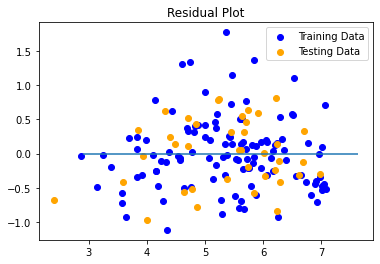

In [16]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(1, figsize=(5, 5))
# axes = Axes3D(fig, elev=20, azim=45)
# axes.scatter(X[:,0], X[:,1], X[:,2], X[:,3], X[:,4], X[:,5], c=y, cmap=plt.cm.get_cmap("Spectral"))
# plt.show()

In [17]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.92288116 1.14897725 0.88895708 1.67607653 0.5683046  0.35257628]]
y-axis intercept:  [1.72086485]


In [18]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.24021211136856918, R2: 0.7800885236825827


In [19]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2352119189923762, R2: 0.784666143358189


In [20]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.23096655834316437, R2: 0.7885527231086811
